## יעילות שינה

#### מגישים:יובל שחר,עידן וידר,אור אריש

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/OrArish/DataSet/main/Sleep_Efficiency.csv'
data = pd.read_csv(url)
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [3]:
data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [4]:
data['bedtime_hour'] = pd.to_datetime(data['Bedtime']).dt.hour
data['wake_hour'] = pd.to_datetime(data['Wakeup time']).dt.hour
data['Age Group'] = pd.cut(data['Age'], bins=[0,18, 25, 40, 50, 70,80 ], labels=["0-18",'student(18-25)', 'familyguy(25-40)', 'midlife crisis(40-50)', 'golden age(50-70)', '71+'])
data['Exercise Frequency Category'] = pd.cut(data['Exercise frequency'], bins=[0,1,2,3,4,5 ], labels=['0-1','1-2','2-3','3-4','4-5'])


בדקנו את ההבדלים בין צריכת קפאין בין גברים ונשים בכל הגילאים ומצאנו שנשים צורכות יותר קפאין מגברים


## הסבר קצר על התחום

**שינה קלה** -המצב בו מתחיל מחזור השינה קל להעיר אותנו בו (השלב הארוך ביותר) 

**שינה עמוקה**-השלב של השני במחזור השינה שרירי הגוף רפויים לגמרי  וגלי המוח ארוכים ביותר

- ** שנת REM(rapid eye motion)**

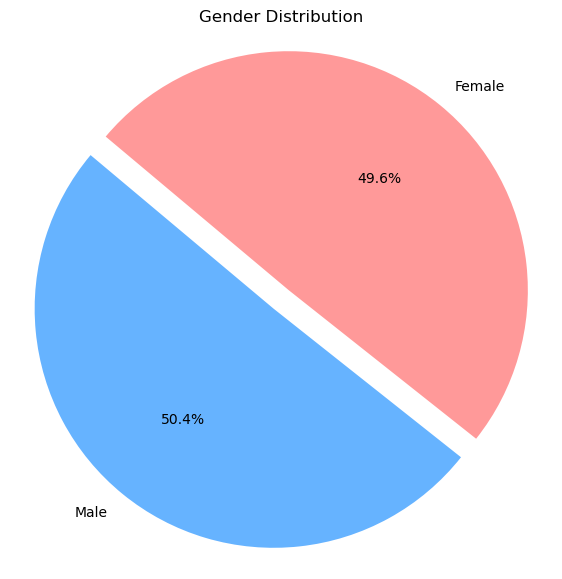

In [5]:
gender_distribution = data['Gender'].value_counts()

# Define labels for the chart
labels = ['Male', 'Female']
# Assuming gender_distribution uses labels; if it uses 0 and 1, adjust accordingly
sizes = [gender_distribution['Male'], gender_distribution['Female']]
colors = ['#66b3ff', '#ff9999']  # Blue for Male, Pink for Female
explode = (0.1, 0)  # Explode the first slice (Male)

# Create a 2D pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## מסקנה ראשונה :השפעת קפאין על יעלות השינה

![](https://raw.githubusercontent.com/OrArish/DataSet/main/picture_1.jpeg)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


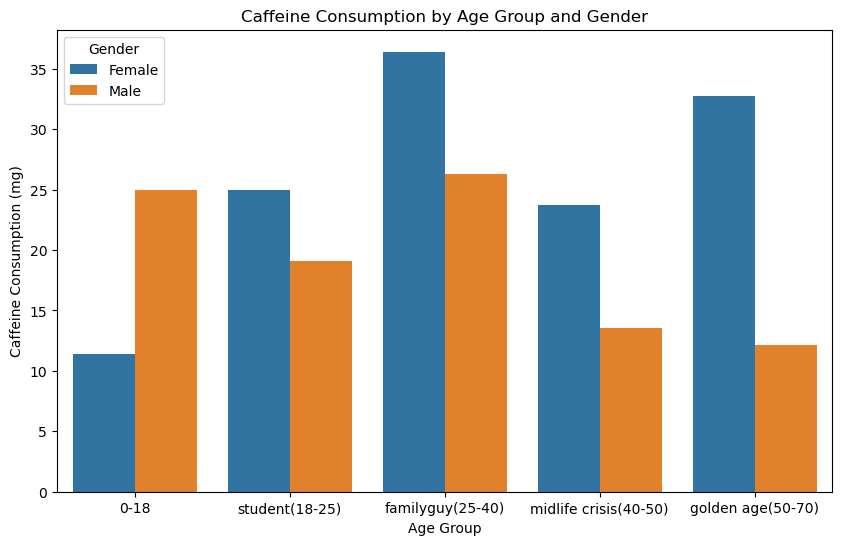

In [6]:

# Assuming 'data' is your DataFrame and it has columns 'Age Group', 'Gender', and 'Caffeine consumption'
#data['Age Group'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
data['Age Group'] = pd.cut(data['Age'], bins=[0,18, 25, 40, 50, 70 ], labels=['0-18','student(18-25)', 'familyguy(25-40)', 'midlife crisis(40-50)', 'golden age(50-70)'])
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age Group', y='Caffeine consumption', hue='Gender',errorbar = None)
plt.title('Caffeine Consumption by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Caffeine Consumption (mg)')
plt.legend(title='Gender')
plt.show()


לאחר שמצאנו שנשים בכל הגילאים צורכות יותר קפאין מגברים
כאן בדקנו את השפעת הקפאין על התעוררויות בלילה (לפי גילאים ומגדר) ומצאנו שנשים מתעוררות יותר בלילה  - מלבד קבוצת הגילאים 61-70 

C:\Users\almog\AppData\Local\Temp\ipykernel_4228\373443305.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=caffeine_consumers, x='Age Group', y='Awakenings', hue='Gender', estimator=np.mean, ci=None)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


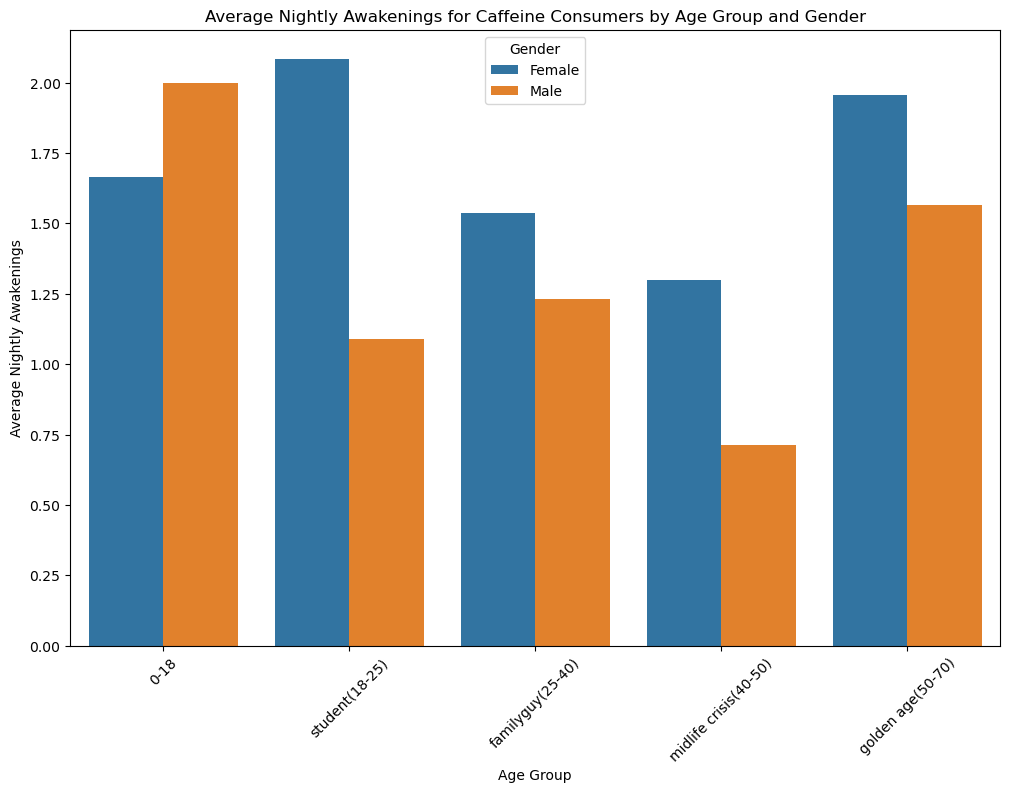

In [7]:
data['Consumes Caffeine'] = data['Caffeine consumption'] > 0

caffeine_consumers = data[data['Consumes Caffeine']]

plt.figure(figsize=(12, 8))
sns.barplot(data=caffeine_consumers, x='Age Group', y='Awakenings', hue='Gender', estimator=np.mean, ci=None)
plt.title('Average Nightly Awakenings for Caffeine Consumers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Nightly Awakenings')
plt.legend(title='Gender')
plt.xticks(rotation=45) 
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Age Group
familyguy(25-40)         164
golden age(50-70)        126
midlife crisis(40-50)     91
student(18-25)            57
0-18                      14
Name: count, dtype: int64
Age Group
familyguy(25-40)         0.362832
golden age(50-70)        0.278761
midlife crisis(40-50)    0.201327
student(18-25)           0.126106
0-18                     0.030973
Name: proportion, dtype: float64


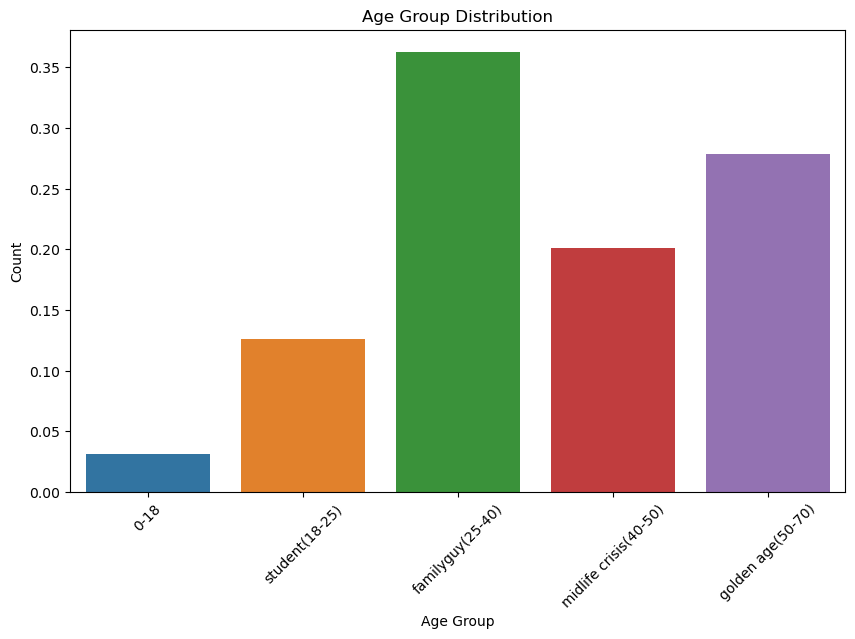

In [8]:
data['Age Group'] = pd.cut(data['Age'], bins=[0,18, 25, 40, 50, 70 ], labels=['0-18','student(18-25)', 'familyguy(25-40)', 'midlife crisis(40-50)', 'golden age(50-70)'])
print(data['Age Group'].value_counts())
age_group_counts = data['Age Group'].value_counts(normalize=True)
print(age_group_counts)

# Plotting the value counts using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()


לאחר המרה נירמול ניתן לראות שאוכלסייה עד גיל 18 אינה רלוונטית עקב כך שהיא קטנה מה5 אחוז נתמקד באוכלוסיית בני 50 עד 70

C:\Users\almog\AppData\Local\Temp\ipykernel_4228\1552908222.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=age_group_50_70, x='Gender', y='Alcohol consumption', ci=None, palette='pastel', ax=axes[0])
C:\Users\almog\AppData\Local\Temp\ipykernel_4228\1552908222.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=age_group_50_70, x='Gender', y='Exercise frequency', ci=None, palette='pastel', ax=axes[1])


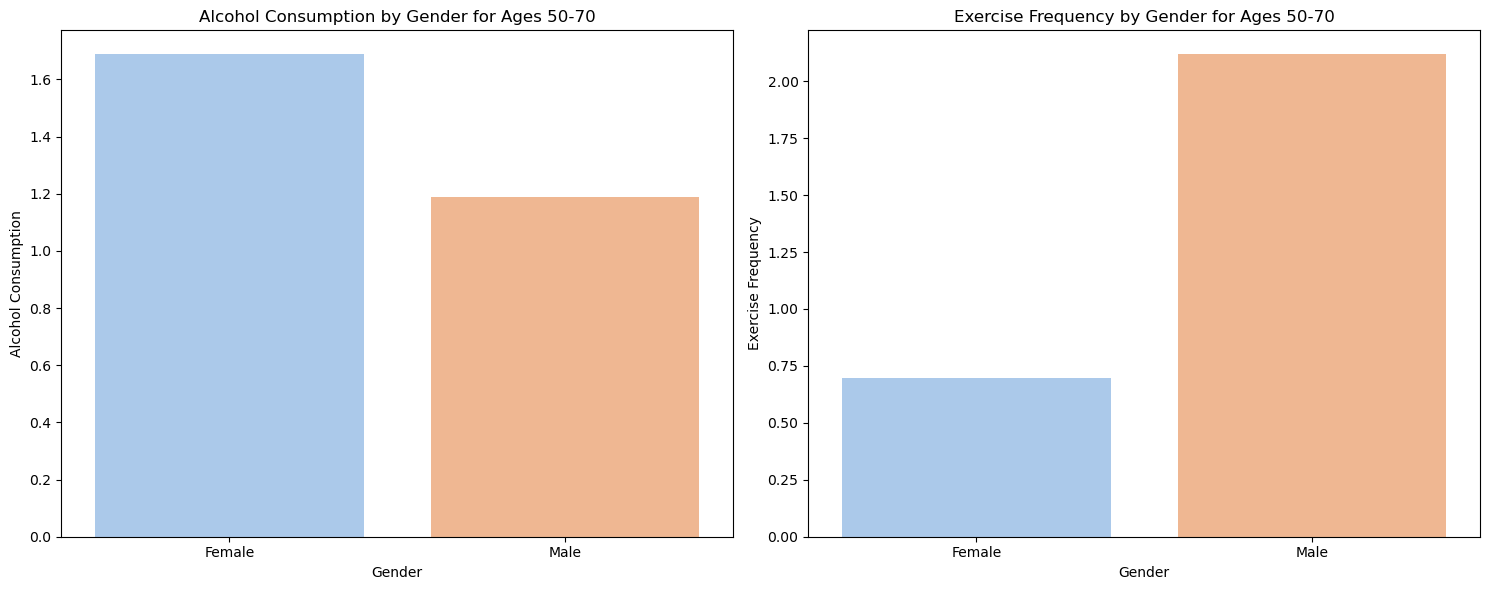

In [9]:


age_group_50_70 = data[(data['Age'] >= 50) & (data['Age'] <= 70)]


fig, axes = plt.subplots(ncols=2, figsize=(15, 6))


sns.barplot(data=age_group_50_70, x='Gender', y='Alcohol consumption', ci=None, palette='pastel', ax=axes[0])
axes[0].set_title('Alcohol Consumption by Gender for Ages 50-70')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Alcohol Consumption')

# Bar plot for exercise frequency by gender
sns.barplot(data=age_group_50_70, x='Gender', y='Exercise frequency', ci=None, palette='pastel', ax=axes[1])
axes[1].set_title('Exercise Frequency by Gender for Ages 50-70')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Exercise Frequency')

# Adjust layout to make sure plots are not overlapping
plt.tight_layout()
plt.show()


## מסקנה 

 - בדקנו את קבוצת הגילאים החריגה 50-70 ומצאנו שהגורם להתעוררויות גבוהות יותר אצל הגברים היא כתוצאה מפעילות גופנית גבוהה יותר
על מנת לשלול גורמים אחרים ראינו בגרף  שצריכת האלכוהול בקרב נשים וגברים זהה.

## מסקנה 2:השפעת אימונים ועישון על יעלות השניה 


![](https:/raw.githubusercontent.com/OrArish/DataSet/main/picture2.jpeg)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


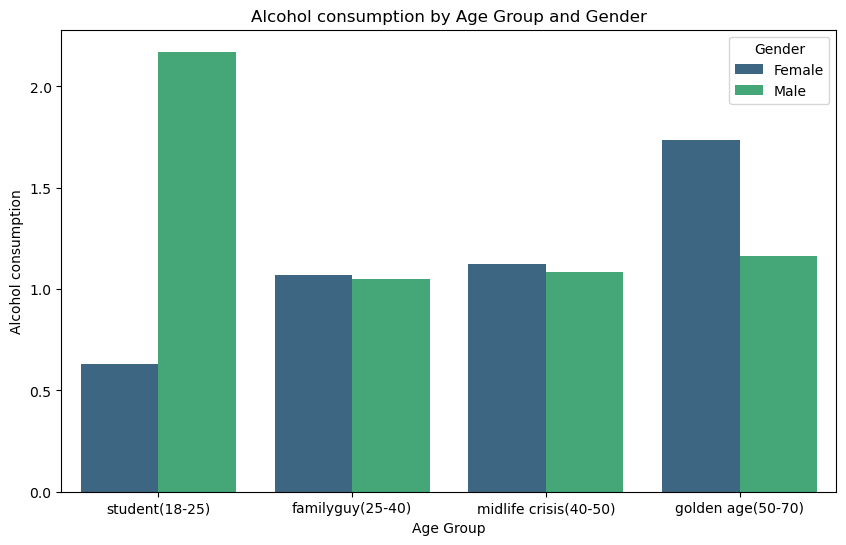

In [10]:

data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 40, 50, 70 ], labels=['student(18-25)', 'familyguy(25-40)', 'midlife crisis(40-50)', 'golden age(50-70)'])
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age Group', y='Alcohol consumption', hue='Gender',palette ='viridis',errorbar = None)
plt.title('Alcohol consumption by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Alcohol consumption')
plt.legend(title='Gender')
plt.show()
data['Age Group'] = pd.cut(data['Age'], bins=[0,18, 25, 40, 50, 70,80 ], labels=["0-18",'student(18-25)', 'familyguy(25-40)', 'midlife crisis(40-50)', 'golden age(50-70)', '71+'])


C:\Users\almog\AppData\Local\Temp\ipykernel_4228\1017985495.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Gender', y='Exercise frequency', palette='viridis', ci=None, ax=axes[0])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\almog\AppData\Local\Temp\ipykernel_4228\1017985495.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Exercise Frequency Category', y='Sleep efficiency', hue='Smoking status',palette ='viridis', ax=axes[2],ci =None)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The de

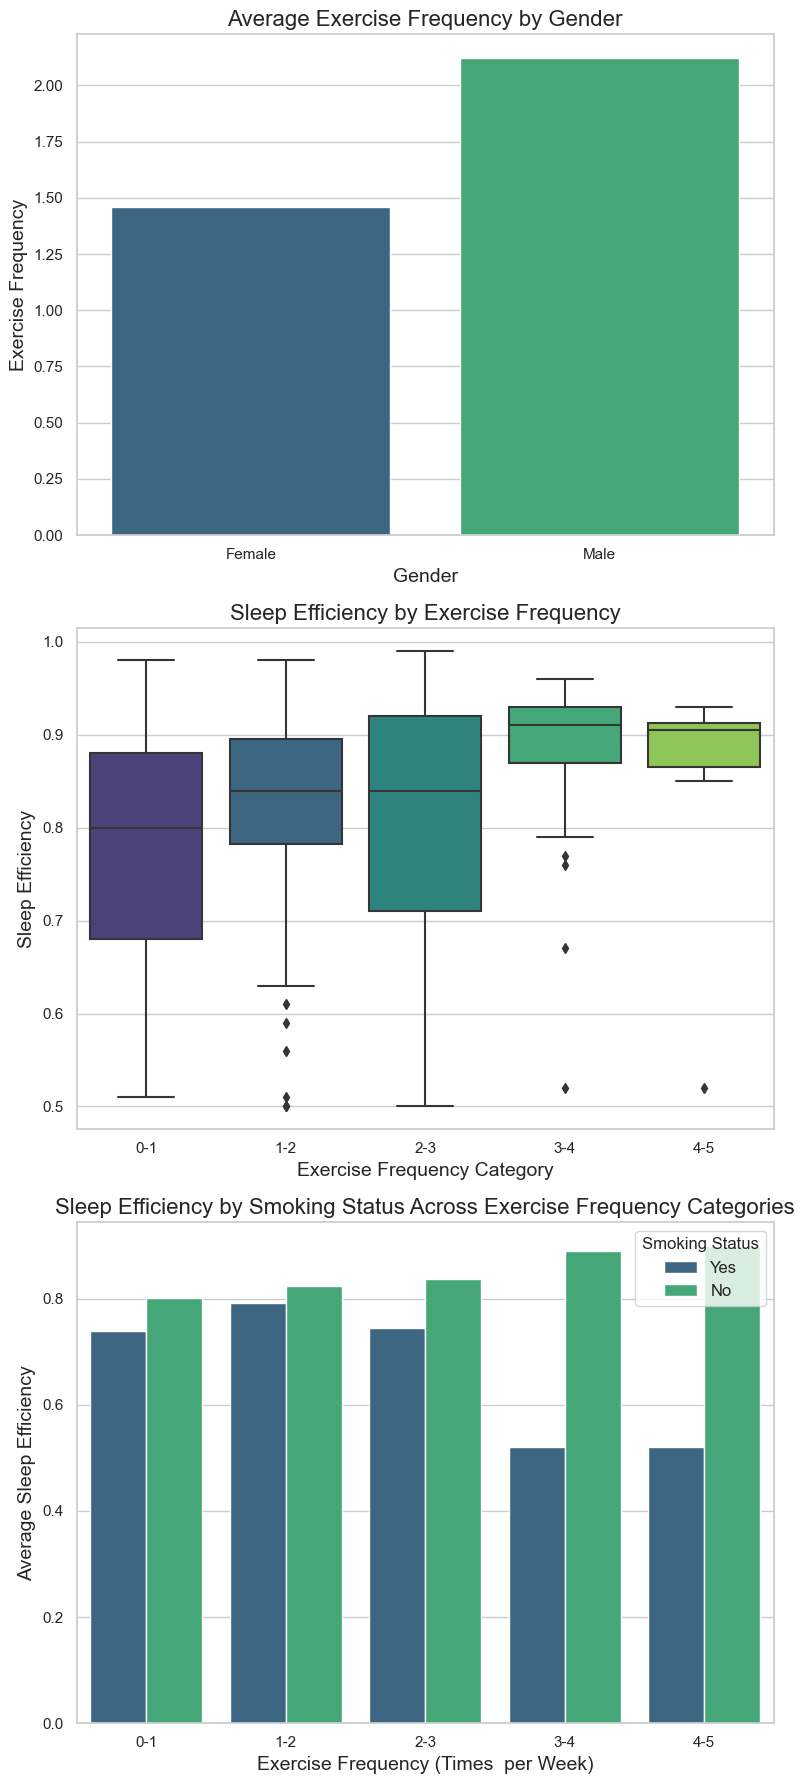

In [11]:
sns.set_theme(style="whitegrid")


fig, axes = plt.subplots(3, 1, figsize=(8, 18))  


sns.barplot(data=data, x='Gender', y='Exercise frequency', palette='viridis', ci=None, ax=axes[0])
axes[0].set_title('Average Exercise Frequency by Gender', fontsize=16)
axes[0].set_xlabel('Gender', fontsize=14)
axes[0].set_ylabel('Exercise Frequency', fontsize=14)


sns.boxplot(data=data, x='Exercise Frequency Category', y='Sleep efficiency', palette='viridis', ax=axes[1])
axes[1].set_title('Sleep Efficiency by Exercise Frequency', fontsize=16)
axes[1].set_xlabel('Exercise Frequency Category', fontsize=14)
axes[1].set_ylabel('Sleep Efficiency', fontsize=14)



sns.barplot(data=data, x='Exercise Frequency Category', y='Sleep efficiency', hue='Smoking status',palette ='viridis', ax=axes[2],ci =None)
axes[2].set_title('Sleep Efficiency by Smoking Status Across Exercise Frequency Categories', fontsize=16)
axes[2].set_xlabel('Exercise Frequency (Times  per Week)', fontsize=14)
axes[2].set_ylabel('Average Sleep Efficiency', fontsize=14)
axes[2].legend(title='Smoking Status', fontsize=12)


plt.tight_layout()


plt.show()

ניתן לראות לפי הגרף שככל שעולים בכמות האימונים השבועית יעילות השינה  יותר גבוהה  

As you can see from the bar chart above .within each group, people who smoke have lower average sleep efficiency.

## מסקנה

תחילה בדקנו את אוכלוסיית המתאמנים לפי מגדר וראינו שאין הבדל ניכר
לאחר מכן בנינו גרף שבודק אם יש קשר בין תדירות האימונים לאיכות השינה - מצאנו שיש קשר בין כמות האימונים ליעילות השינה 
בדקנו את אוכלוסיית המתאמנים בהשוואה למעשנים-לא מעשנים וראינו הבדל ניכר . ובנוסף רצינו לראות את כמות ההשפעה שיש בעקבות תדירות האימונים בהשוואה ליעילות השינה בין המעשנים- ללא מעשנים
וניתן לראות שכאשר כמות האימונים 4-5 פעמים בשבוע ניתן לראות הבדל גדול ביותר באיכות השינה בקרב הלא מעשנים לעומת המעשנים

## מסקנה 3

## מסקנה 3

In [12]:
mean_sleep_duration = data['Sleep duration'].groupby(data['Smoking status']).mean()
print(mean_sleep_duration)

Smoking status
No     7.463087
Yes    7.470779
Name: Sleep duration, dtype: float64


<Axes: xlabel='Smoking status', ylabel='wake_hour'>

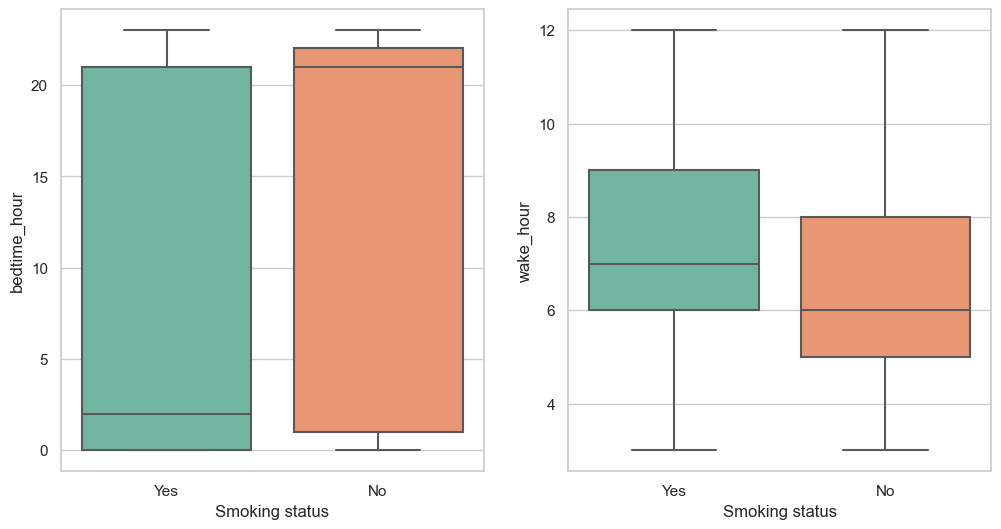

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Smoking status', y='bedtime_hour', palette='Set2')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Smoking status', y='wake_hour', palette='Set2')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


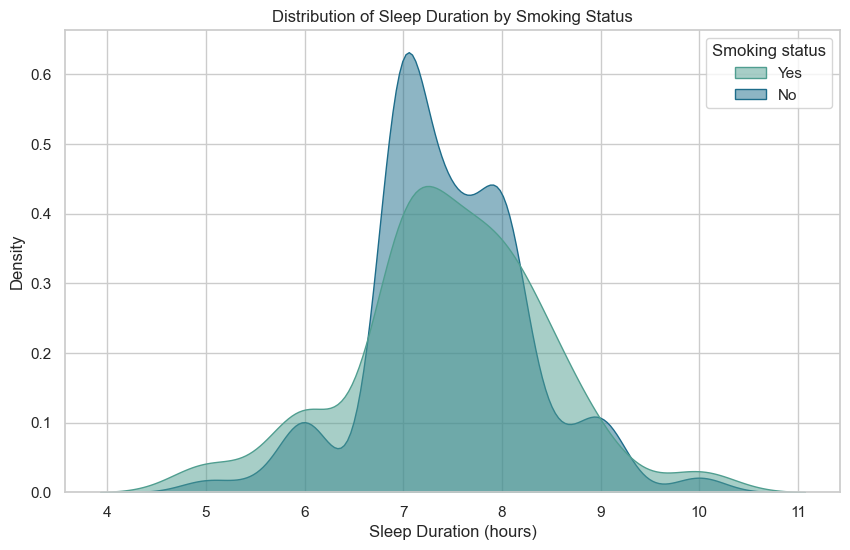

In [14]:
plt.figure(figsize=(10, 6))
# Plot KDE for each smoking status
sns.kdeplot(data=data, x='Sleep duration', hue='Smoking status', fill=True, common_norm=False, palette="crest", alpha=0.5)
plt.title('Distribution of Sleep Duration by Smoking Status')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Density')
plt.show()


In [15]:
data['good_sleep'] = data['Sleep duration']*data['REM sleep percentage']*0.01
data['bad_sleep'] = data['Sleep duration']*data['Light sleep percentage']*0.01
data['deep_sleep'] = data['Sleep duration']*data['Deep sleep percentage']*0.01
data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,...,Smoking status,Exercise frequency,bedtime_hour,wake_hour,Age Group,Exercise Frequency Category,Consumes Caffeine,good_sleep,bad_sleep,deep_sleep
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,...,Yes,3.0,1,7,golden age(50-70),2-3,False,1.08,0.720,4.200
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,...,Yes,3.0,2,9,golden age(50-70),2-3,False,1.33,3.710,1.960
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,...,No,3.0,21,5,familyguy(25-40),2-3,False,1.60,0.800,5.600
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,...,Yes,1.0,2,8,familyguy(25-40),0-1,True,1.38,3.120,1.500
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,...,No,3.0,1,9,golden age(50-70),2-3,False,2.16,1.440,4.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,...,No,5.0,22,5,familyguy(25-40),4-5,False,1.65,1.575,4.275
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,...,No,3.0,21,3,golden age(50-70),2-3,True,1.68,0.900,3.420
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,...,Yes,0.0,23,7,familyguy(25-40),NaN,False,1.70,4.080,2.720
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,...,No,3.0,21,4,midlife crisis(40-50),2-3,False,1.26,0.700,5.040


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


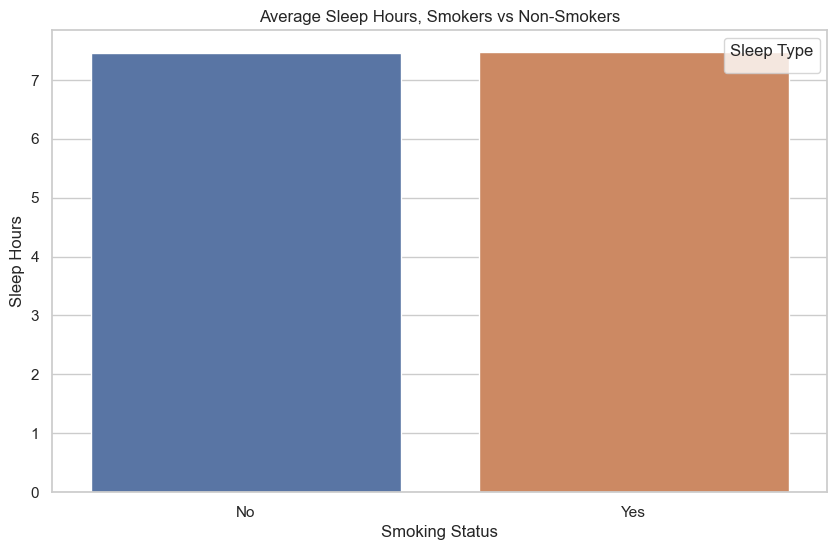

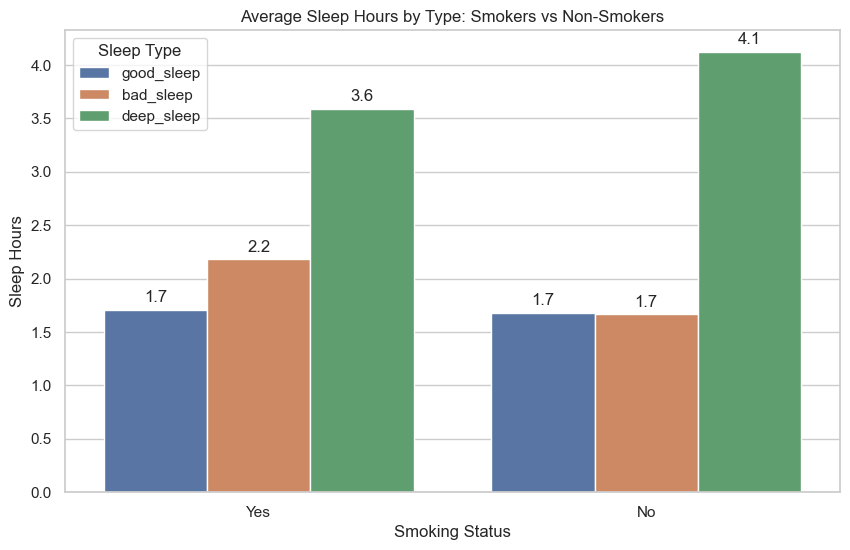

In [16]:
melted_df = pd.melt(data, id_vars='Smoking status', value_vars=['good_sleep','bad_sleep','deep_sleep'], 
                      var_name='Sleep Type', value_name='avg_sleep_hours_duration')
df = data.pivot_table(index ='Smoking status',values ='Sleep duration',aggfunc="mean").reset_index()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Smoking status', y='Sleep duration')
# Set plot title and labels
plt.title('Average Sleep Hours, Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Sleep Hours')
plt.legend(title='Sleep Type')
plt.show()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=melted_df, x='Smoking status', y='avg_sleep_hours_duration', hue='Sleep Type',errorbar=None)
# Add annotations
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Set plot title and labels
plt.title('Average Sleep Hours by Type: Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Sleep Hours')
plt.legend(title='Sleep Type')
plt.show()

# #mean sum



 ## מסקנה :

רצינו ראות האם עישון משפיע על שעות שינה ואיכות השינה גילינו שמי שמעשן פזור השינה שךו יותר נרחב כלומר הרבה ישנים מעבר ל 8 שעות או ישנים פחות מ7 מאשר האוכלסייה שלא מעשנת.

 בנוסף גילנו שאף על פי שבממוצע שני האוכלוסייות ישנות אותו דבר אוכלוסיית הלא מעשנים ישנה הרבה יותר טוב(שינה עמוקה) לעומת אוכלסיית המעשנים שיש לה יותר שינה קלה.